cifar-10 images sre 32X32 pixels 
vgg get 224X224 pixels.
make sure to upsample

In [1]:
import torch
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
from torch.utils.data import DataLoader, random_split
import time

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from utils.load_data import get_dataloaders

# Define parameters
data_dir = "./data"
batch_size = 64
val_split = 0.2

# Get DataLoaders
train_loader, val_loader, test_loader = get_dataloaders(
    data_dir=data_dir, batch_size=batch_size, val_split=val_split
)

# Access the train dataset to retrieve class information
train_dataset = (
    train_loader.dataset.dataset
)  # Access raw dataset inside TransformDataset
classes = train_dataset.classes  # Class names

# Get one image per class
images_per_class = {}
for image, label in train_dataset:
    if label not in images_per_class:
        images_per_class[label] = (image, label)
    if len(images_per_class) == len(classes):  # Stop once we have one image per class
        break

# Plot one image per class
plt.figure(figsize=(15, 10))
for i, (label, (image, _)) in enumerate(images_per_class.items()):
    image = image.permute(1, 2, 0).numpy()  # Convert to HWC format
    mean = np.array([0.49139968, 0.48215841, 0.44653091])
    std = np.array([0.24703223, 0.24348513, 0.26158784])
    image = std * image + mean  # De-normalize the image
    image = np.clip(image, 0, 1)  # Clip to valid range [0, 1]

    plt.subplot(2, 5, i + 1)  # Assuming 10 classes (CIFAR-10)
    plt.imshow(image)
    plt.title(classes[label])
    plt.axis("off")

plt.suptitle("One Image per Class")
plt.tight_layout()
plt.show()

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Mean: [0.49139968 0.48215841 0.44653091]
Std: [0.24703223 0.24348513 0.26158784]


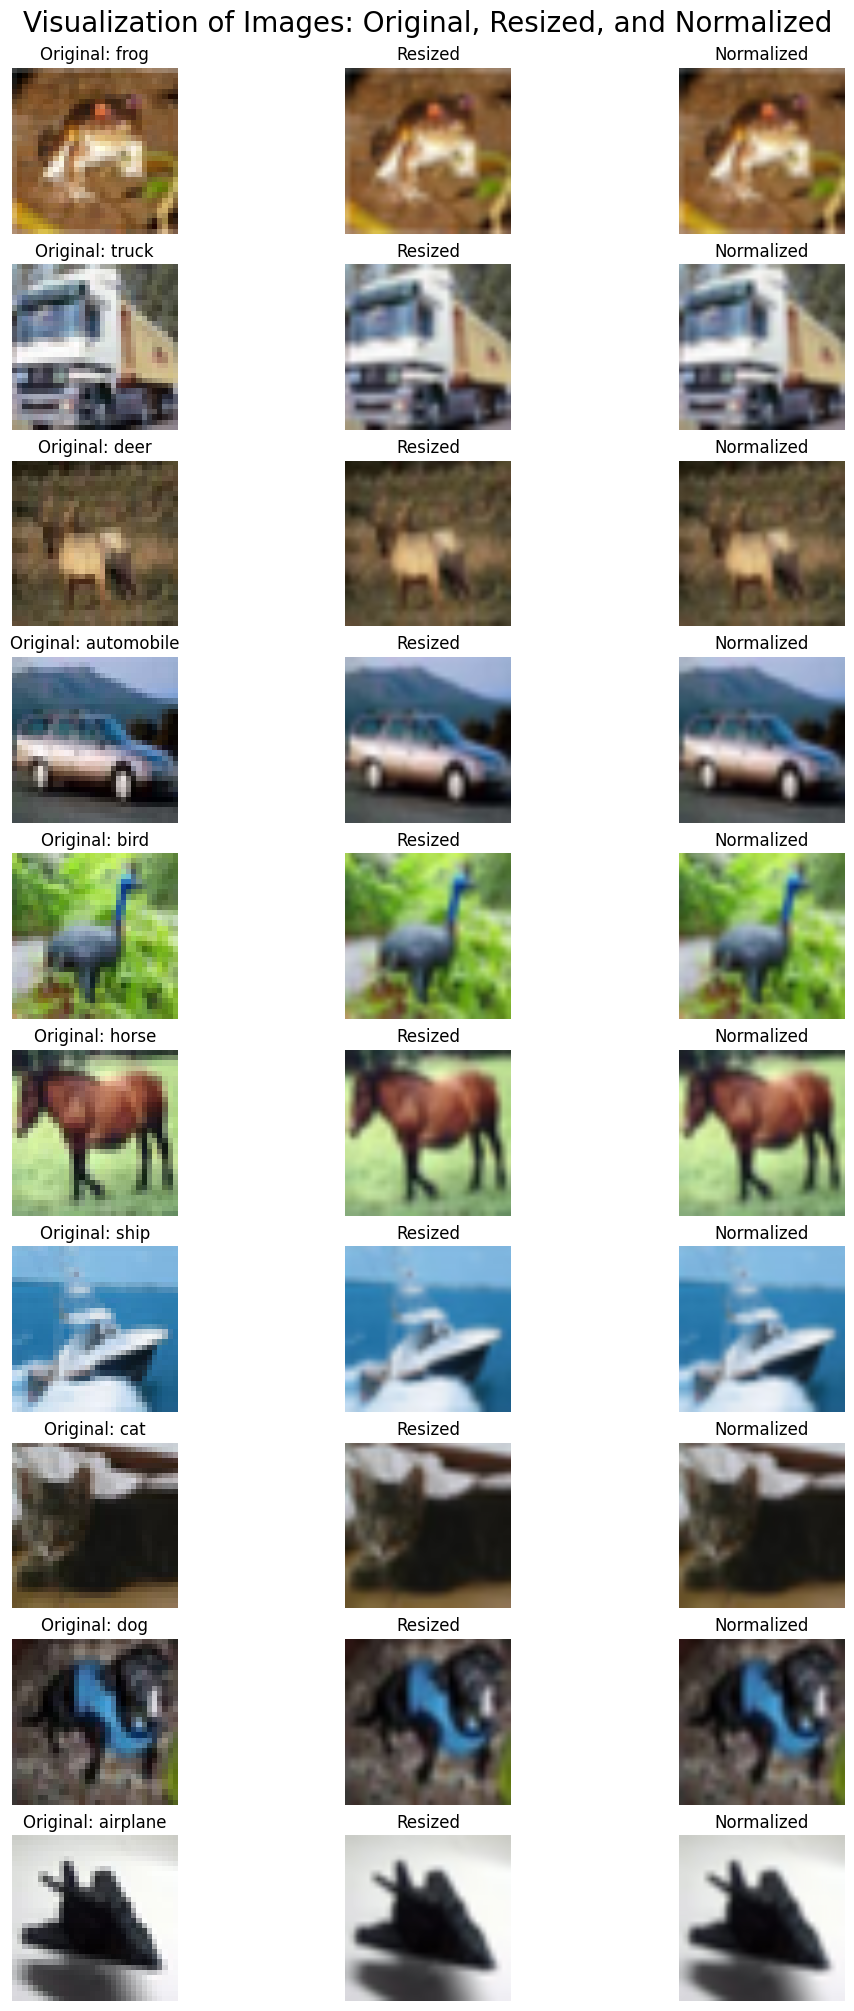

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Number of classes
num_classes = len(classes)

# Create the figure and subplots with constrained layout
fig, axes = plt.subplots(
    num_classes, 3, figsize=(12, 4 * num_classes), constrained_layout=True
)

for idx, (label, (image, _)) in enumerate(images_per_class.items()):
    # Original image
    image_original = np.asarray(image)

    # Resized image
    image_resized = resize_transform(image).permute(1, 2, 0).numpy()

    # Normalized image
    image_normalized = normalize_transform(image).permute(1, 2, 0).numpy()
    image_normalized_display = (
        image_normalized * train_std + train_mean
    )  # De-normalize for visualization
    image_normalized_display = np.clip(image_normalized_display, 0, 1)

    # Plot original
    axes[idx, 0].imshow(image_original)
    axes[idx, 0].set_title(f"Original: {classes[label]}", fontsize=12)
    axes[idx, 0].axis("off")

    # Plot resized
    axes[idx, 1].imshow(image_resized)
    axes[idx, 1].set_title("Resized", fontsize=12)
    axes[idx, 1].axis("off")

    # Plot normalized
    axes[idx, 2].imshow(image_normalized_display)
    axes[idx, 2].set_title("Normalized", fontsize=12)
    axes[idx, 2].axis("off")

# Add an overall title to the figure
fig.suptitle(
    "Visualization of Images: Original, Resized, and Normalized",
    fontsize=18,
    fontweight="bold",
)
plt.show()